In [1]:
import sys
sys.path.append('../..') # Asegúrate de que Python pueda encontrar el paquete src


# import libraries
import numpy as np
from typing import Dict, Any
import matplotlib.pyplot as plt
import scienceplots

from src.physics.pulses import GaussianPulse1D, GaussianPulse2D,  format_value

plt.style.use(['science', 'notebook'])
# plt.style.use('dark_background')

c = 299792458  # (m/s)

In [2]:
# Input beam parameters
input_width_wl = 44e-9             # (m) wl: wavelength
fundamental_wavelength = 795e-9    # (m)

input_pulse = GaussianPulse1D(x0=fundamental_wavelength, FWHM=input_width_wl, steps=1000)
wavelenght, A_wavelenght = input_pulse.generate_pulse()
wavelenght, I_wavelenght = input_pulse.generate_intensity()
sigma_wavelength = input_pulse.standard_deviation()

# Obtener el diccionario con los parámetros del pulso
pulse_dict = input_pulse.as_dict()
print("--------------- Pulse parameters in wavelength --------------- ")
for key, value in pulse_dict.items():
    formatted_value = format_value(value)
    print(f"{key.replace('_', ' ').title()}: {formatted_value}")

# Parameters in frequency
fundamental_frequency = (2*np.pi*c) / fundamental_wavelength  # (Hz = 1/s) | 23.69 PHz
sigma_frequency = (2*np.pi*c) / (fundamental_wavelength**2) * sigma_wavelength  # (Hz) | 55.69 PHz

input_pulse_omega = GaussianPulse1D(x0=fundamental_frequency, steps=1000, std=sigma_frequency)
omega, A_omega = input_pulse_omega.generate_pulse()
omega, I_omega = input_pulse_omega.generate_intensity()

# Obtener el diccionario con los parámetros del pulso
pulse_dict_omega = input_pulse_omega.as_dict()
print("--------------- Pulse parameters in frequency --------------- ")
for key, value in pulse_dict_omega.items():
    formatted_value = format_value(value)
    print(f"{key.replace('_', ' ').title()}: {formatted_value}")

--------------- Pulse parameters in wavelength --------------- 
Center: 7.95e-07
Fwhm: 4.40e-08
Sigma: 1.87e-08
Steps: 1000
Times Std: 5
Computed Fwhm: 4.40e-08
--------------- Pulse parameters in frequency --------------- 
Center: 2.37e+15
Fwhm: None
Sigma: 5.57e+13
Steps: 1000
Times Std: 5
Computed Fwhm: 1.31e+14


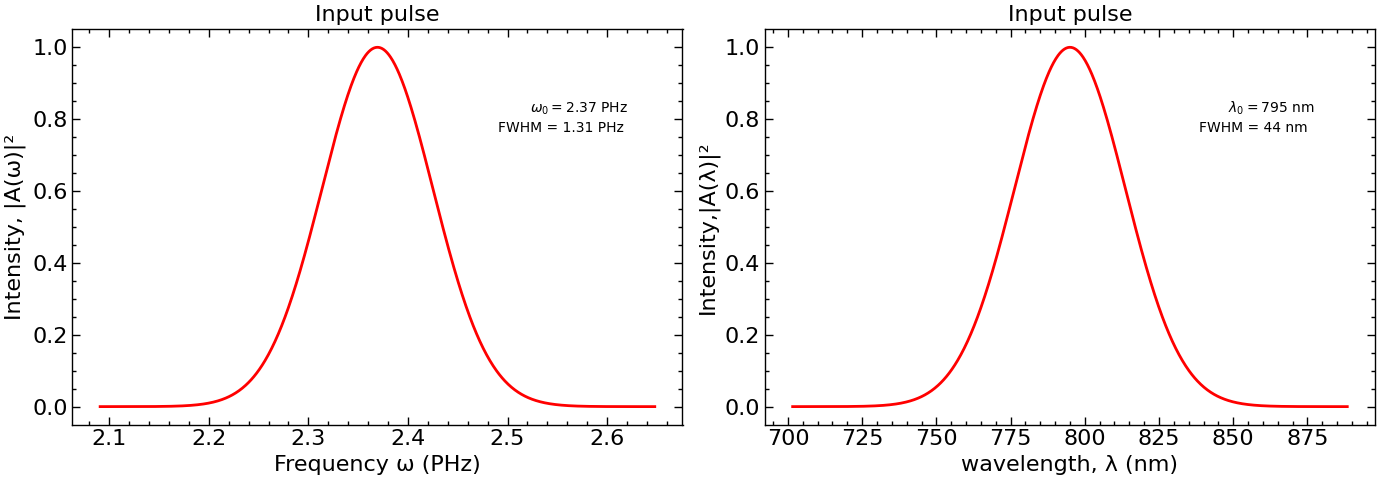

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica (a): Pulso de entrada vs omega
axs[0].plot(omega*1e-15, I_omega , color='red', linestyle='-')
axs[0].set_ylabel('Intensity, |A(ω)|²')
axs[0].set_xlabel('Frequency ω (PHz)')
axs[0].set_title('Input pulse')
# Agregar texto en la gráfica (b)
axs[0].text(0.83, 0.8, r"$\omega_0 = 2.37$ PHz", ha='center', va='center', transform=axs[0].transAxes, fontsize=10)
axs[0].text(0.8, 0.75, r"FWHM = 1.31 PHz", ha='center', va='center', transform=axs[0].transAxes, fontsize=10)

# Gráfica (a): Pulso de entrada vs longitud de onda
axs[1].plot(wavelenght*1e9, I_wavelenght, color='red', linestyle='-')
axs[1].set_ylabel('Intensity,|A(λ)|²')
axs[1].set_xlabel('wavelength, λ (nm)')
axs[1].set_title('Input pulse')
# Agregar texto en la gráfica (b)
axs[1].text(0.83, 0.8, r"$\lambda_0 = 795$ nm", ha='center', va='center', transform=axs[1].transAxes, fontsize=10)
axs[1].text(0.8, 0.75, r"FWHM = 44 nm", ha='center', va='center', transform=axs[1].transAxes, fontsize=10)

plt.tight_layout()
plt.show()

### Fundamental pulse convolution
---

**Self-Convolution Term $(F(\omega))$**: Autoconvolution of the fundamental field
            
$$
     (A * A)(\omega) = F(\omega) = \int_{\mathbb{R}} A_\omega(\omega') A_\omega(\omega - \omega') \, d\omega'
$$

where
- $\omega'$: is the frequency of the fundamental field.
- $\omega$: is the frequency of the harmonic field.

In [4]:
omega 

array([2.09093327e+15, 2.09149070e+15, 2.09204814e+15, 2.09260558e+15,
       2.09316302e+15, 2.09372045e+15, 2.09427789e+15, 2.09483533e+15,
       2.09539276e+15, 2.09595020e+15, 2.09650764e+15, 2.09706507e+15,
       2.09762251e+15, 2.09817995e+15, 2.09873739e+15, 2.09929482e+15,
       2.09985226e+15, 2.10040970e+15, 2.10096713e+15, 2.10152457e+15,
       2.10208201e+15, 2.10263944e+15, 2.10319688e+15, 2.10375432e+15,
       2.10431176e+15, 2.10486919e+15, 2.10542663e+15, 2.10598407e+15,
       2.10654150e+15, 2.10709894e+15, 2.10765638e+15, 2.10821381e+15,
       2.10877125e+15, 2.10932869e+15, 2.10988613e+15, 2.11044356e+15,
       2.11100100e+15, 2.11155844e+15, 2.11211587e+15, 2.11267331e+15,
       2.11323075e+15, 2.11378818e+15, 2.11434562e+15, 2.11490306e+15,
       2.11546050e+15, 2.11601793e+15, 2.11657537e+15, 2.11713281e+15,
       2.11769024e+15, 2.11824768e+15, 2.11880512e+15, 2.11936255e+15,
       2.11991999e+15, 2.12047743e+15, 2.12103486e+15, 2.12159230e+15,
      

In [5]:
I_omega

array([3.72665317e-06, 3.91772257e-06, 4.11817563e-06, 4.32845128e-06,
       4.54900786e-06, 4.78032389e-06, 5.02289898e-06, 5.27725460e-06,
       5.54393506e-06, 5.82350839e-06, 6.11656732e-06, 6.42373029e-06,
       6.74564247e-06, 7.08297688e-06, 7.43643546e-06, 7.80675024e-06,
       8.19468457e-06, 8.60103432e-06, 9.02662921e-06, 9.47233415e-06,
       9.93905056e-06, 1.04277179e-05, 1.09393151e-05, 1.14748620e-05,
       1.20354212e-05, 1.26220996e-05, 1.32360499e-05, 1.38784725e-05,
       1.45506176e-05, 1.52537867e-05, 1.59893348e-05, 1.67586722e-05,
       1.75632668e-05, 1.84046462e-05, 1.92844001e-05, 2.02041823e-05,
       2.11657131e-05, 2.21707822e-05, 2.32212508e-05, 2.43190546e-05,
       2.54662060e-05, 2.66647977e-05, 2.79170048e-05, 2.92250884e-05,
       3.05913983e-05, 3.20183766e-05, 3.35085605e-05, 3.50645861e-05,
       3.66891919e-05, 3.83852223e-05, 4.01556312e-05, 4.20034862e-05,
       4.39319723e-05, 4.59443963e-05, 4.80441905e-05, 5.02349177e-05,
      

In [6]:
def fundamental_field_spectrum(omega_0, omega, sigma_omega, E_0: float = 1.0):
        """
        Calculates the spectrum of the fundamental field E_1(omega) as a Gaussian pulse.

        Parameters
        ----------
        omega : float or array
            Frequencies in rad/s.
        sigma_omega : float
            Spectral width of the Gaussian pulse in rad/s.
        E_0 : float, optional
            Amplitude of the field in V/m. Default is 1.0 (normalized).

        Returns
        -------
        float or array
            The spectrum E_1(omega) of the fundamental field.
        """
        omega = np.asarray(omega)
        if sigma_omega <= 0:
            raise ValueError("Spectral width sigma_omega must be positive.")

        return E_0 * np.exp(-((omega - omega_0)**2) / (2 * sigma_omega**2))

In [7]:
fundamental = fundamental_field_spectrum(omega=omega, omega_0=fundamental_frequency, sigma_omega=sigma_frequency)

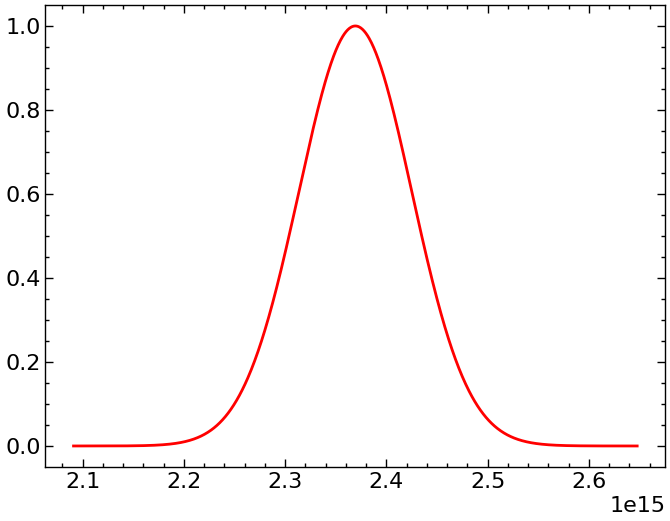

In [8]:
plt.plot(omega, fundamental, color='red', linestyle='-')

In [9]:
N =1000 # Una potencia de 2 seia ideal

# define frequency range for FFT
omega_min = np.min(omega)
omega_max = np.max(omega)
domega = (omega_max - omega_min) / (N-1)  # steps 
omega_range = np.linspace(omega_min, omega_max, N)

# Transfom to time domain
A_time = np.fft.ifft(A_omega) # Inverse Forier Fast Transformation to get A_(t)

# convolution in time domain
A_time_squared = A_time * A_time 

# Transform back to frequency domain to get F(omega)
F_omega = np.fft.fft(A_time_squared)

# Interpolate F_omega to the input omega points
F = np.interp(omega, omega_range, np.abs(F_omega)) # Deben tener la misma cantidad de puntos "omega_range" y "np.abs(F_omega)"

In [10]:
len(F_omega)

1000

In [11]:
len(omega_range)

1000

In [12]:
len(omega)

1000

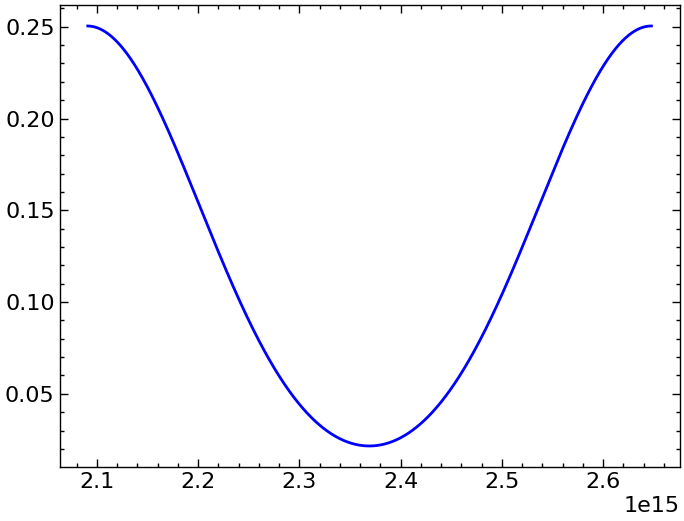

In [13]:
plt.plot(omega, F, color='blue', linestyle='-')

Lets define the convolution of gaussian with itself analitically. It results as follows

$$
(f∗g)(t) = \frac{1}{\sqrt{2\pi(\sigma^2_1 + \sigma^2_2​)}} exp\bigg({−\frac{(t−(\omega_1​ + \omega_2​))^2}{2(\sigma^2_1 + \sigma^2_2​​)}}\bigg)
$$​

In [14]:
def gaussian_selfconvolution(x, mu1, mu2, std1, std2):
    mu = mu1 = mu2
    std = std1**2 + std2**2 
    A = 1 / (2*np.pi*std)**0.5
    
    return A * np.exp(-((x - mu)**2) / (2 * std))    # Normalized Gaussian function
       

In [15]:
# evaluasmos la funcion en el pulso en frecuencia
F_test = gaussian_selfconvolution(omega, fundamental_frequency, fundamental_frequency, sigma_frequency, sigma_frequency)

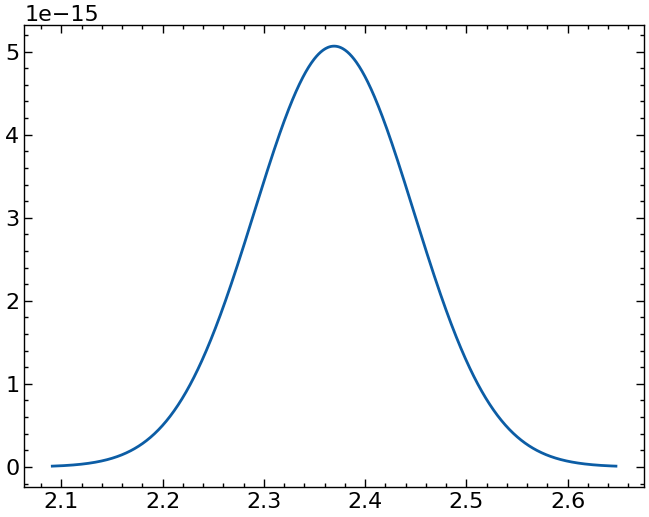

In [16]:
plt.plot(omega*1e-15, F_test)